# **Practica 8 - Ecuaciones de Fresnel.**.
Valentina Merchán Sanchez, Sergio Alejandro Prieto, Angee Vanessa Segura.  
  Mediciones de Optica y Acustica.  
  Universidad Nacional de Colombia - 2025-1

La fórmula para la difracción producida por una rendija en una dimensión es:

\begin{align}
I(x) = I_0 \left( \frac{\sin\left( \frac{\pi a x}{\lambda L} \right)}{ \frac{\pi a x}{\lambda L} } \right)^2
\end{align}

En este caso, para el experimento se utilizó un láser rojo con una longitud de onda de 
$\lambda = (650 \pm 5)\,\text{nm} = (0{,}00065 \pm 0{,}000005)\,\text{mm}$, 
y la distancia desde la rendija hasta la pantalla fue de 
$L = (475{,}3 \pm 0{,}1)\,\text{cm} = (4753 \pm 1)\,\text{mm}$.

Los mínimos de intensidad ocurren cuando el argumento del seno en el numerador es un múltiplo entero de $\pi$, es decir:

\begin{align}
\frac{\pi a x}{\lambda L} = m\pi \quad \Rightarrow \quad a = \frac{m \lambda L}{x}
\end{align}

Para el primer mínimo ($m = 1$), se obtiene:

\begin{align}
a = \frac{\lambda L}{x}
\end{align}



El ancho de la rendija utilizada fue 1.0641281486600231mm


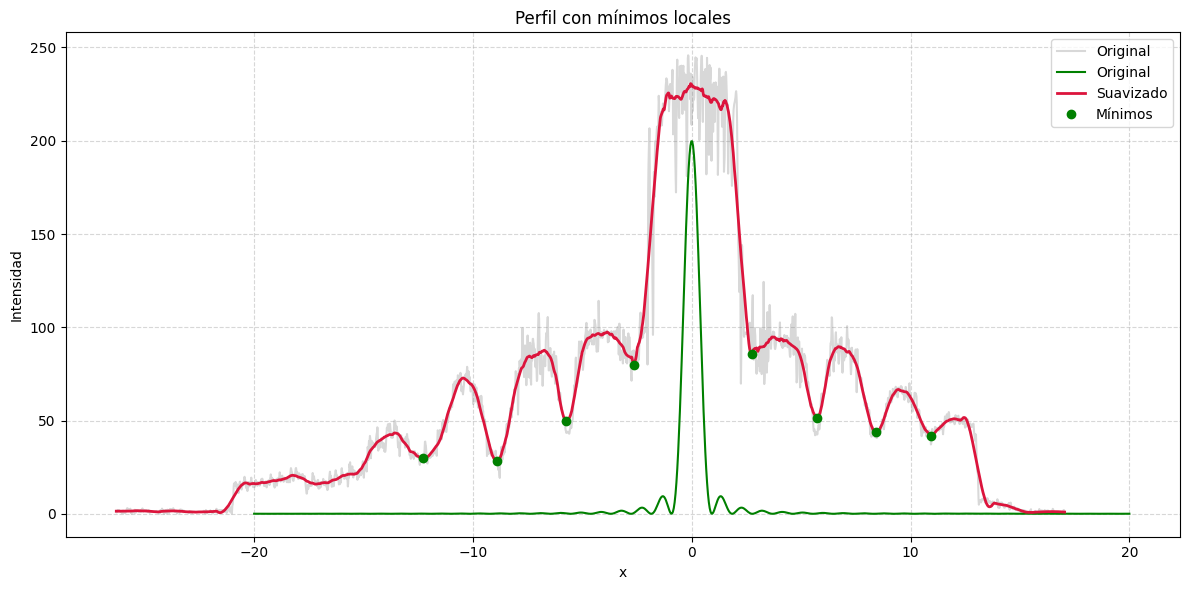

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# Leer y suavizar datos
df = pd.read_csv("Rendija.txt", sep='\t', decimal=',', header=None, names=["x", "y"])
y_suave = savgol_filter(df.y, 101, 2)

# Encontrar mínimos
p = 8
mins, _ = find_peaks(-y_suave, prominence=p)
min_coords = np.array([[df.x.iloc[i], y_suave[i]] for i in mins])

# ENCONTRAR ANCHO
mins = np.append(min_coords[:, 0], 0)
mins = np.sort(mins)
d=np.array([])
λ=0.00065    
L=4753
for i in range(len(mins)-1):
    d=np.append(d,-(mins[i]-mins[i+1]))
#Los minimos ocurren cada d, portanto si reemplazamos en la formula x=d podemos encontrar a
x=np.mean(d)
a=λ*L/x
print(f'El ancho de la rendija utilizada fue {a}mm')

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.x, df.y, alpha=0.3, color="gray", label="Original")
x0=np.linspace(-20,20,1000)
plt.plot(x0,200*np.sinc(np.pi *a*x0/(λ* L))**2, color="g", label="Original")
plt.plot(df.x, y_suave, color="crimson", linewidth=2, label="Suavizado")
plt.plot(min_coords[:, 0], min_coords[:, 1], "o", color="green", label="Mínimos")

plt.xlabel("x")
plt.ylabel("Intensidad")
plt.title("Perfil con mínimos locales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




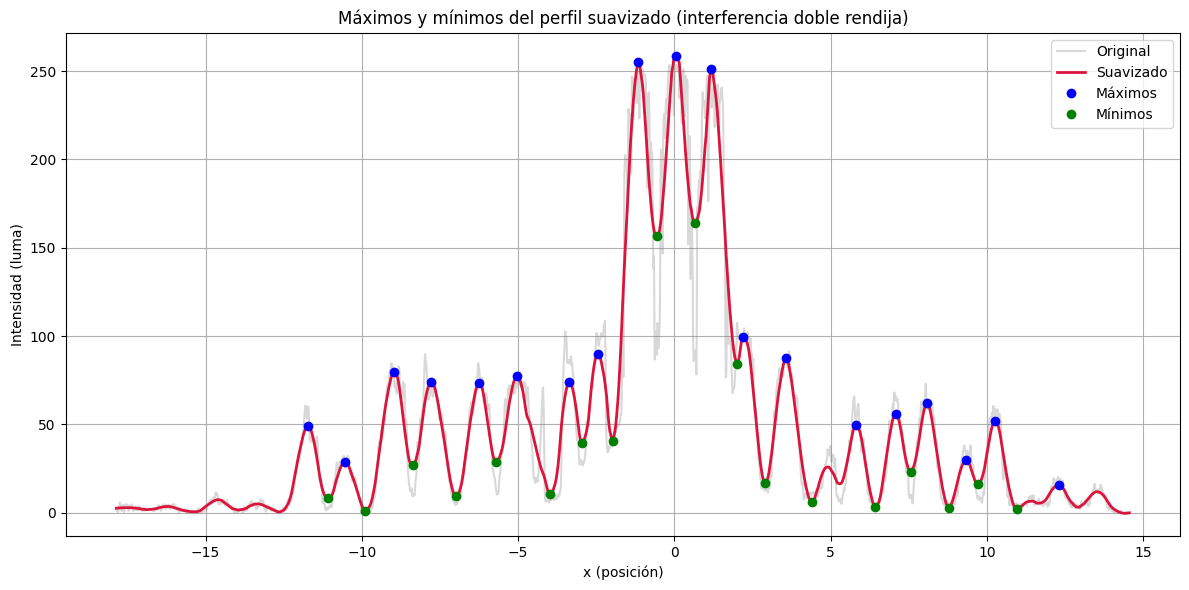

Máximos prominentes encontrados:
x = 12.29, y = 15.55
x = 10.26, y = 52.01
x = 9.34, y = 29.93
x = 8.08, y = 62.11
x = 7.09, y = 56.15
x = 5.82, y = 49.60
x = 3.57, y = 87.45
x = 2.18, y = 99.54
x = 1.19, y = 251.09
x = 0.06, y = 258.72
x = -1.15, y = 254.98
x = -2.44, y = 89.64
x = -3.37, y = 73.77
x = -5.02, y = 77.38
x = -6.24, y = 73.46
x = -7.78, y = 74.20
x = -8.97, y = 79.86
x = -10.54, y = 28.95
x = -11.72, y = 49.36

Mínimos prominentes encontrados:
x = 10.95, y = 2.25
x = 9.71, y = 16.05
x = 8.77, y = 2.71
x = 7.57, y = 22.99
x = 6.43, y = 3.55
x = 4.41, y = 5.88
x = 2.90, y = 16.92
x = 2.00, y = 84.43
x = 0.65, y = 163.93
x = -0.56, y = 156.51
x = -1.97, y = 40.78
x = -2.96, y = 39.74
x = -3.99, y = 10.61
x = -5.71, y = 28.66
x = -7.00, y = 9.32
x = -8.38, y = 27.04
x = -9.91, y = 1.28
x = -11.08, y = 8.16


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter, find_peaks

# Ruta al archivo de datos
archivo = "DobleRendija.txt"

# Leer datos con tabulación y coma decimal
df = pd.read_csv(archivo, sep='\t', decimal=',', header=None, names=["x", "y"])

# Suavizado tipo seno para reducir ruido
suave = savgol_filter(df["y"], window_length=101, polyorder=2)

# --- Encontrar máximos y mínimos con filtrado por prominencia ---
# Puedes ajustar estos valores según la calidad de los datos:
prominencia = 10  # cuánta diferencia con los alrededores debe haber

indices_max, _ = find_peaks(suave, prominence=prominencia)
indices_min, _ = find_peaks(-suave, prominence=prominencia)

# --- Graficar perfil y extremos ---
plt.figure(figsize=(12, 6))
plt.plot(df["x"], df["y"], label="Original", alpha=0.3, color="gray")
plt.plot(df["x"], suave, label="Suavizado", linewidth=2, color="crimson")
plt.plot(df["x"].iloc[indices_max], suave[indices_max], "o", color="blue", label="Máximos")
plt.plot(df["x"].iloc[indices_min], suave[indices_min], "o", color="green", label="Mínimos")

plt.xlabel("x (posición)")
plt.ylabel("Intensidad (luma)")
plt.title("Máximos y mínimos del perfil suavizado (interferencia doble rendija)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Imprimir coordenadas ---
print("Máximos prominentes encontrados:")
for i in indices_max:
    print(f"x = {df['x'].iloc[i]:.2f}, y = {suave[i]:.2f}")

print("\nMínimos prominentes encontrados:")
for i in indices_min:
    print(f"x = {df['x'].iloc[i]:.2f}, y = {suave[i]:.2f}")


El ancho de la rendija utilizada fue 1.0937248314425754mm


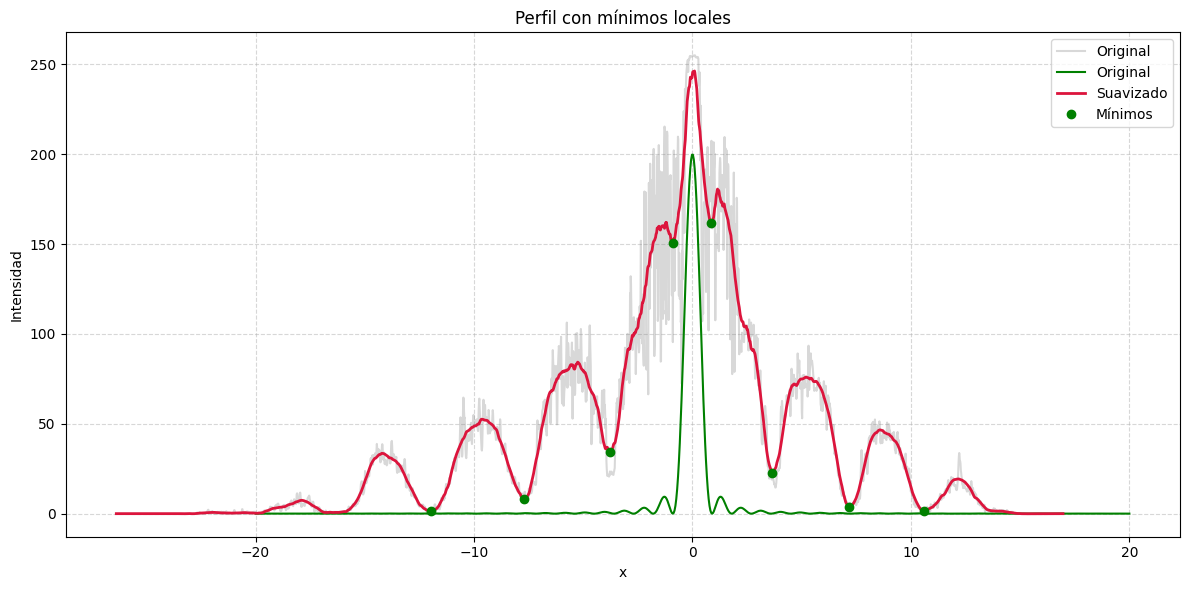

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# Leer y suavizar datos
df = pd.read_csv("Pelo.txt", sep='\t', decimal=',', header=None, names=["x", "y"])
y_suave = savgol_filter(df.y, 101, 2)

# Encontrar mínimos
p = 8
mins, _ = find_peaks(-y_suave, prominence=p)
min_coords = np.array([[df.x.iloc[i], y_suave[i]] for i in mins])

# ENCONTRAR ANCHO
mins = np.append(min_coords[:, 0], 0)
mins = np.sort(mins)
d=np.array([])
λ=0.00065    
L=4753
for i in range(len(mins)-1):
    d=np.append(d,-(mins[i]-mins[i+1]))
#Los minimos ocurren cada d, portanto si reemplazamos en la formula x=d podemos encontrar a
x=np.mean(d)
a=λ*L/x
print(f'El ancho de la rendija utilizada fue {a}mm')

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.x, df.y, alpha=0.3, color="gray", label="Original")
x0=np.linspace(-20,20,1000)
plt.plot(x0,200*np.sinc(np.pi *a*x0/(λ* L))**2, color="g", label="Original")
plt.plot(df.x, y_suave, color="crimson", linewidth=2, label="Suavizado")
plt.plot(min_coords[:, 0], min_coords[:, 1], "o", color="green", label="Mínimos")
#plt.ylim(0,300)
plt.xlabel("x")
plt.ylabel("Intensidad")
plt.title("Perfil con mínimos locales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


